In [1]:
# Hypthesis
#Making a guess(not wild guess) based on assumption without scientific proof or explaining the situation based on reasonable assumption 


#null hypothesis = HO => Decision always leads to status quo. Current status /assumption doesn't change 
#Alternative Hypothesis => Ha => Decision leads to opposite of HO

In [2]:
#ONE tail and two tail test 

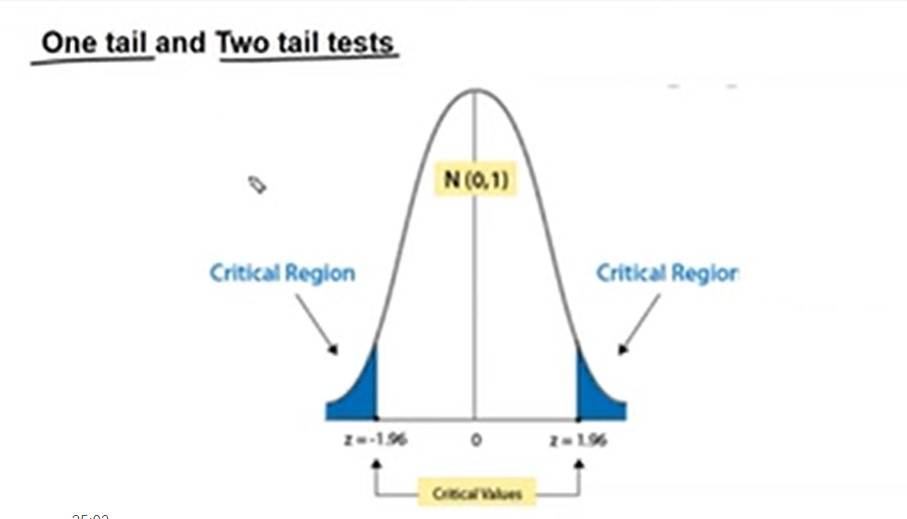

# one tail test 

# left tail test 

example = car mileage test 

ho - all our cars average mileage is greater than 25mpl 

ha - avg mileage is less than 25kmpl 

left-tailed test : the alternative hypothesis contains the '<' sign

# Right tail test 

example - new method will reduce delivery time 

ho- our new home delivery method will reduce delivery time

ha-New method will increase the delivery time 

Right tailed test : The alternative hypothesis contains the '>' sign 

# Two tail test 

example- Difference in mileage when drove by two different person.

Two tailed test : The alternative hypothesis contains the '=!' ,(not is equal to sign )

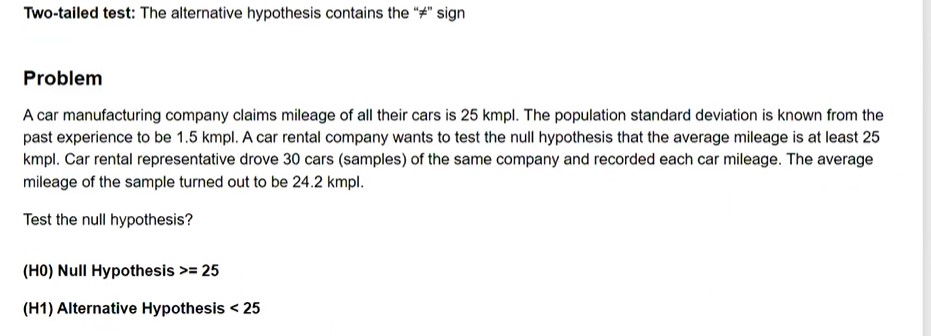

In [4]:
import numpy as np

In [5]:
mean = 25 
sample_mean = 24.2
std = 1.5
n = 30 

In [6]:
z = (sample_mean - mean)/(std/np.sqrt(30))
z 
# Below z scores need to check in the Z-table to get the p value 

-2.921186973360889

In [7]:
#using statistic tools 

In [8]:
import scipy.stats as st 
import numpy as np 
p_value = st.norm.cdf (sample_mean , loc = mean , scale = std/np.sqrt(30))
p_value 

0.0017435024460706768

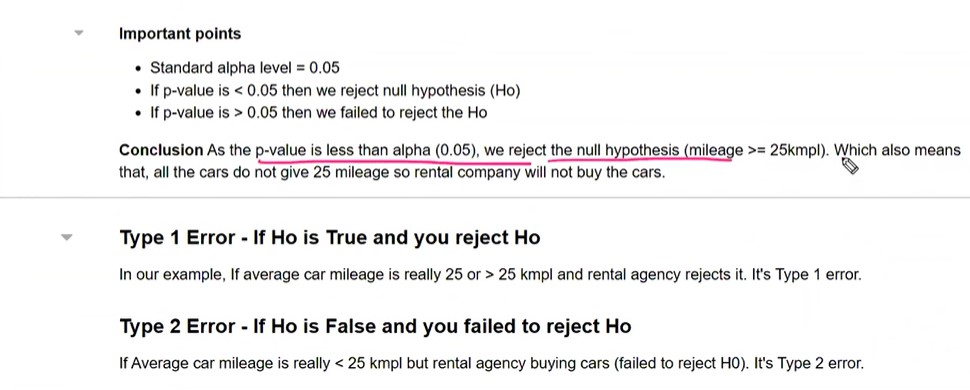

# Statistics tools :

`ttest or student'ttest

ANOVA 

Chi-square

# ttest

1.One sample ttest

2.two sample ttest

In [9]:
#conduct ttest when standard deviation is not known 

In [15]:
import pandas as pd
hyp = pd.read_csv("Hypothesis ttest.csv")
hyp.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


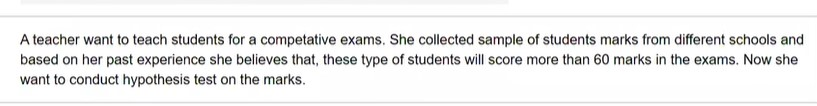

In [16]:
# HO = mu >= 60 
# Ha = mu < 60

In [18]:
hyp['Math1'].mean()

52.645

In [19]:
alpha = .05
xbar = 52.645
mu = 60


# 1.sample test 

In [20]:
import scipy.stats as st

In [21]:
#since we are conducting test for one sample . we will go for 1 sample ttest.
st.ttest_1samp(hyp.Math1,mu)

Ttest_1sampResult(statistic=-11.102736525713398, pvalue=1.3339158110547646e-22)

In [22]:
# when you run ttest we get 2 values 1. t statistics score and 2.pvalue for two tail 
#pvalue 

In [23]:
#lets try this way 
s,p = st.ttest_1samp(hyp.Math1 , mu)

In [24]:
s

-11.102736525713398

In [25]:
p

1.3339158110547646e-22

# 2. Sample ttest 


1,independent sample 

2.paired sample 

In [26]:
hyp.head()

,ID,Gender,Race,SEB,School,Prog,Read,Write,Math1,Math2,SST
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [33]:
hyp['Gender'].value_counts()

1    109
0     91
Name: Gender, dtype: int64

In [32]:
#how to subset the data on gender 
hyp[hyp['Gender']==1].Math1.head()

1     53
92    65
93    52
94    46
95    61
Name: Math1, dtype: int64

In [37]:
# Independent sample 
t,p = st.ttest_ind(hyp[hyp['Gender']==1].Math1,hyp[hyp['Gender']==0].Math1)

In [38]:
p

0.6800544974232143

In [39]:
#paired sample
t,p =st.ttest_rel(hyp.Math1 , hyp.Math2)


In [40]:
p

0.1767652560550735

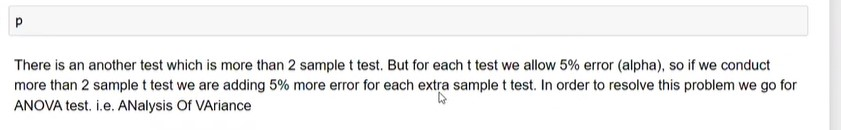

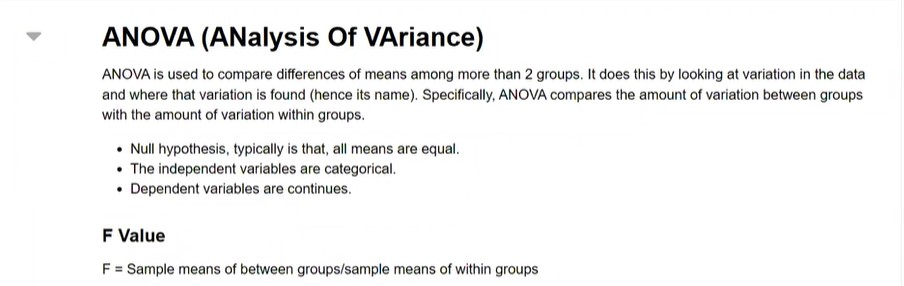

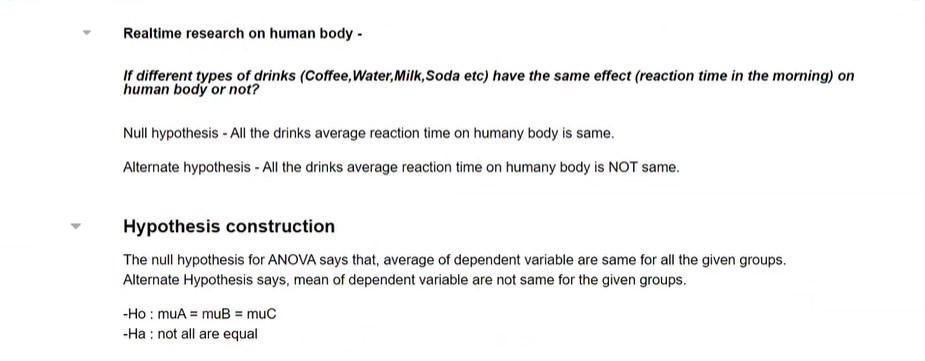

In [41]:
#step1 calculate the mean of each semester 
#step2 calculate the grand mean 
#step3 variation between within 
#step4 calculate the mean squared variance of between and within 
#step5 calculate the F statistics and corrosponding p value 

In [42]:
import pandas as pd
hyp = pd.read_csv('Semester marks.csv')
hyp

,Student_ID,Semester,Total_Marks
0,1,1,365
1,2,3,376
2,3,1,411
3,4,3,436
4,5,2,366
...,...,...,...
195,196,1,431
196,197,3,330
197,198,1,311
198,199,1,358


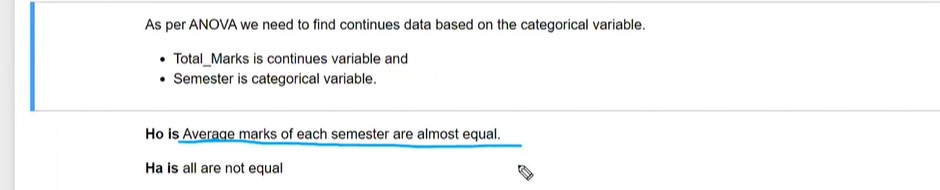

In [46]:
import numpy as np
import statsmodels.formula.api as sm 
mod = sm.ols('Total_Marks ~ Semester ' ,data = hyp).fit()
mod

In [47]:
import statsmodels.api as k
aov_table = k.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Semester,1.0,291.846746,291.846746,0.102572,0.749102
Residual,198.0,563366.873254,2845.287239,NaN,NaN


# let's see manually if the avg marks of each semester are close to each other 

In [51]:
# Semester one Average marks 
print('1st sem avg marks - ' , np.ceil(hyp['Total_Marks'][hyp['Semester']==1].mean()))

#semester two average marks 
print("2nd semester avg marks - " , np.ceil(hyp['Total_Marks'][hyp['Semester']==2].mean()))

#semester three avg marks 
print("3rd semester avg marks -" , np.ceil(hyp)['Total_Marks'][hyp['Semester']==3].mean())

1st sem avg marks -  403.0
2nd semester avg marks -  393.0
3rd semester avg marks - 405.66


# Chi square test

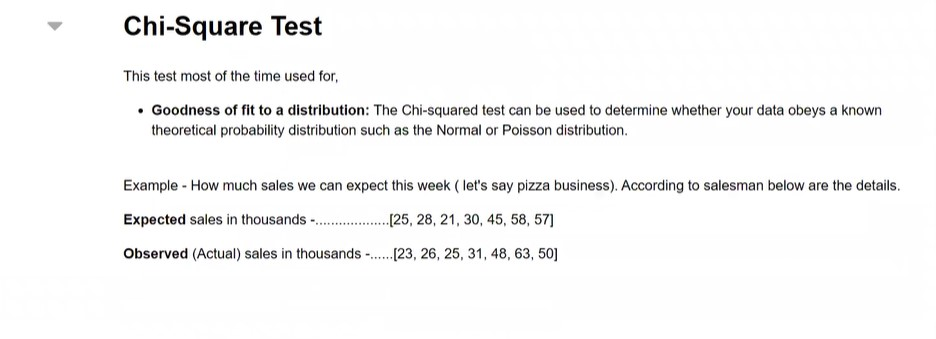

# let's understand how to work on this situation :

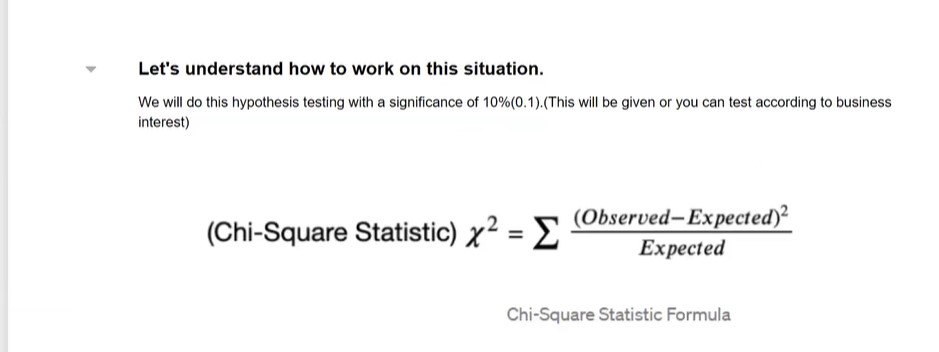

In [54]:
import numpy as np 
#expected[25,28,21,30,45,58,57]
#observed[23,26,25,31,48,63,50]
chi_ind = [np.square(23-25)/25,
           np.square(26-28)/28,
           np.square(25-21)/21,
           np.square(31-30)/30,
           np.square(48-45)/45,
           np.square(63-58)/58,
           np.square(50-57)/57]
print('Our chi square test statistics score => ' , np.sum(chi_ind))


Our chi square test statistics score =>  2.5887788436608763


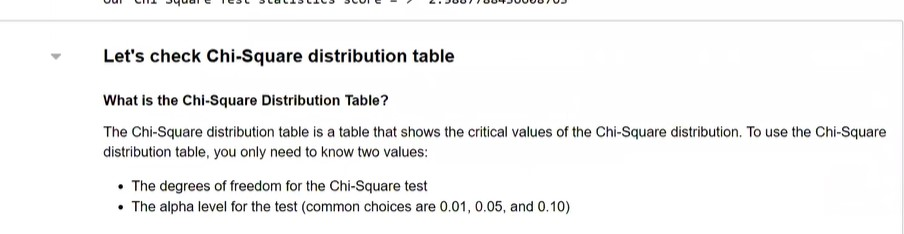

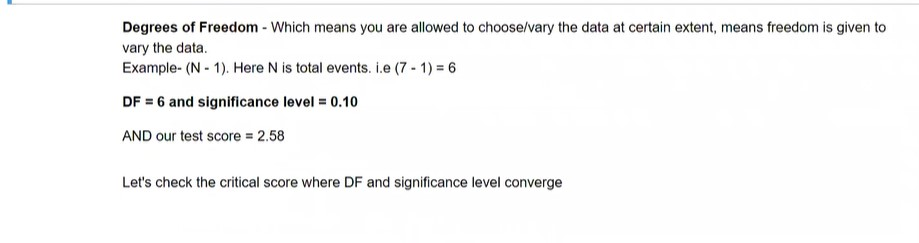

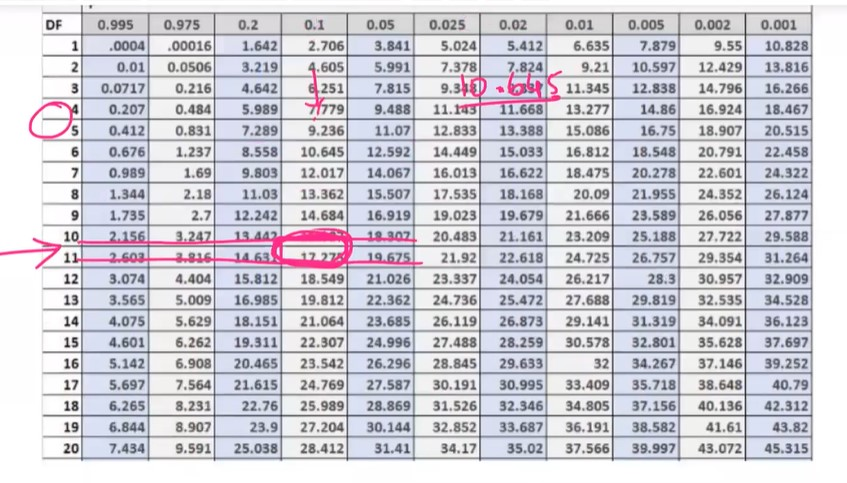

# conclusion

as the critical score in the table(10.645) greater than our test score (2.58) . we can not reject the null hypothesis .which also means the salesman expectations were also true 

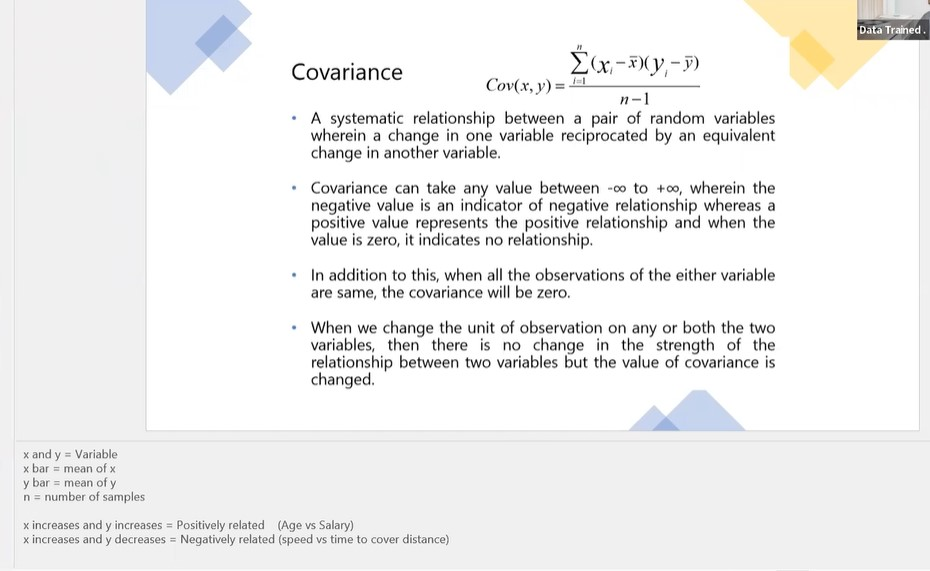

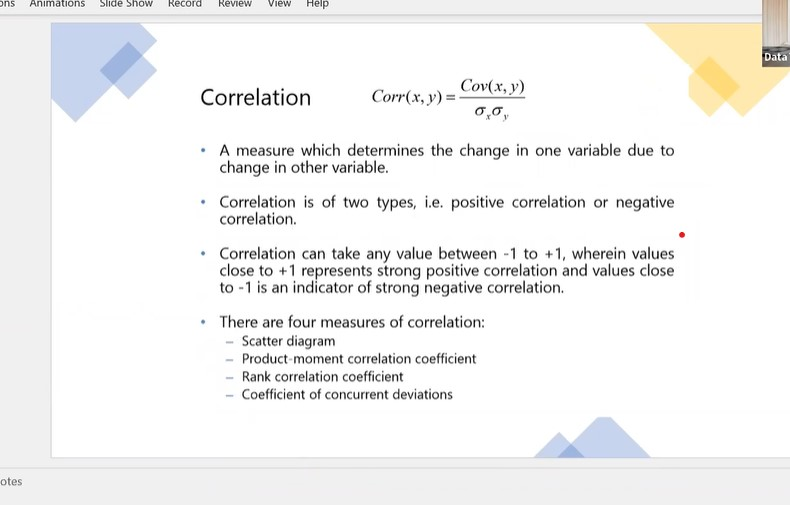

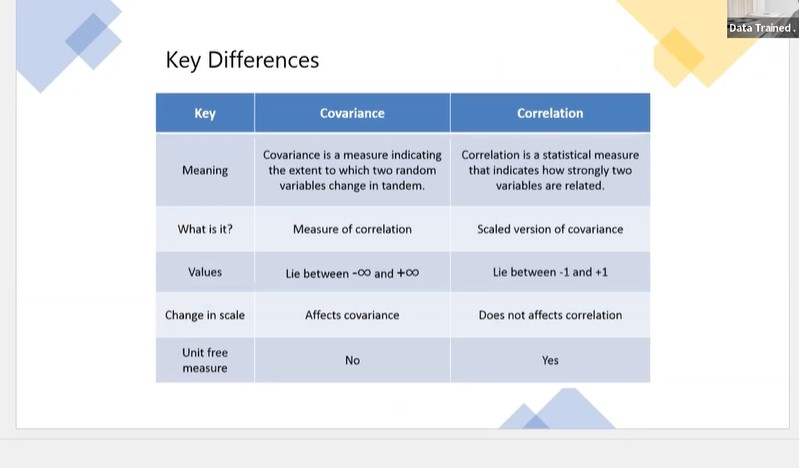

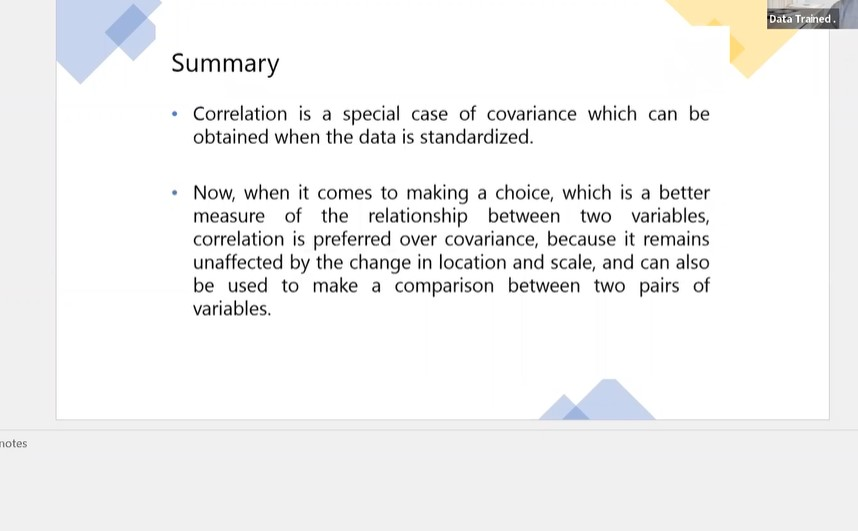